# **Practical No: 9**

**AIM:** Clustering Algorithms

**CODE and OUTPUT:**

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


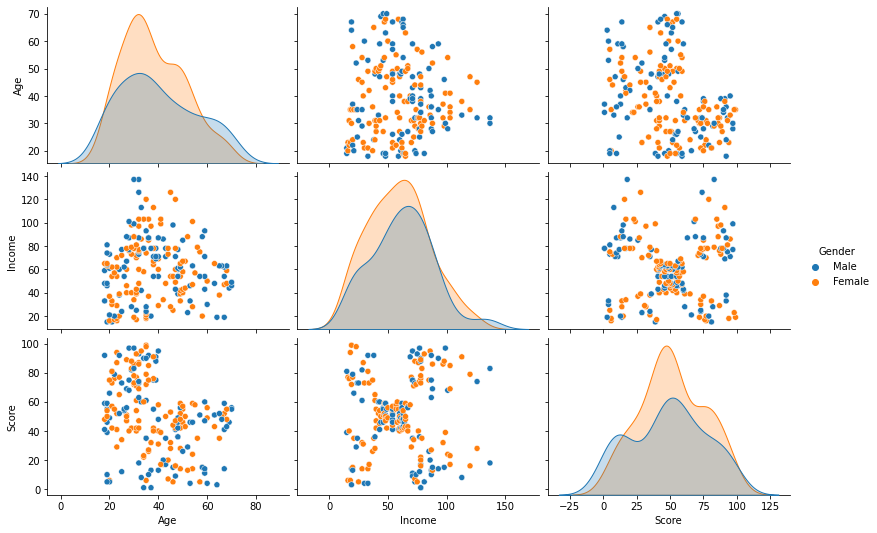

In [4]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

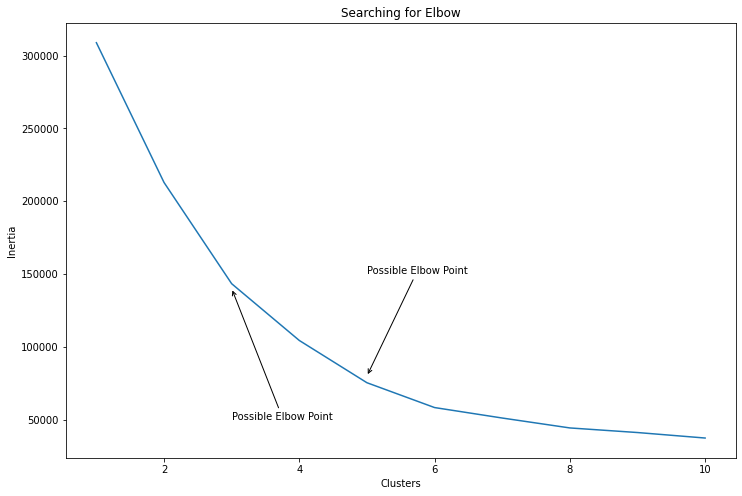

In [5]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

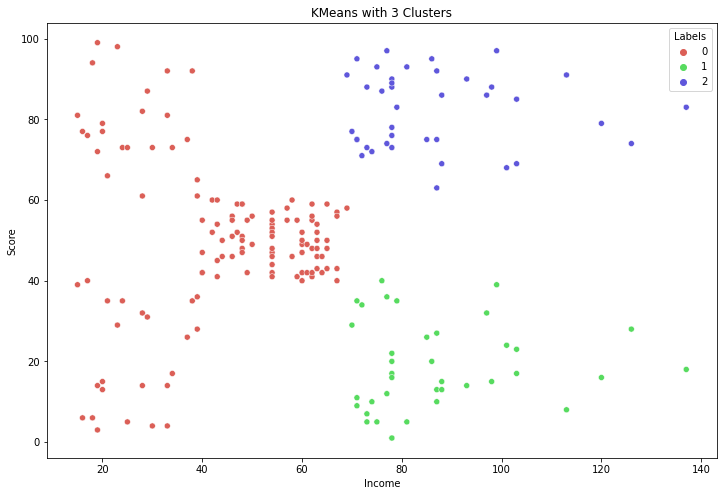

In [ ]:
km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3))

plt.title('KMeans with 3 Clusters')
plt.show()

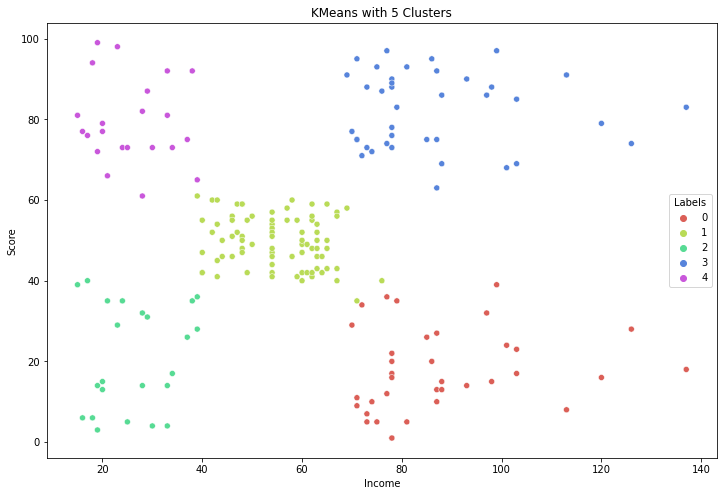

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))

plt.title('KMeans with 5 Clusters')
plt.show()

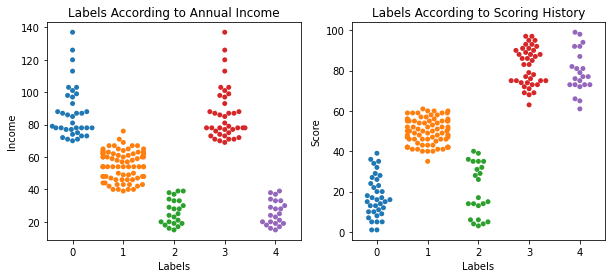

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')
plt.show()

Text(0.5, 1.0, 'Agglomerative with 5 Clusters')

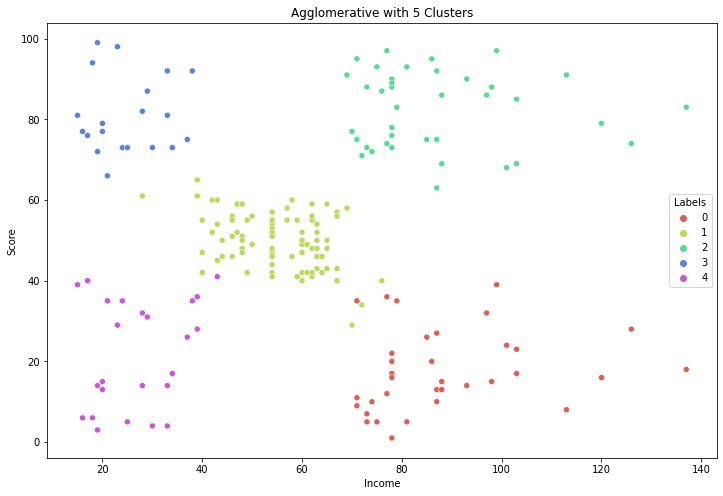

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')